In [1]:
import ctypes
import os
import threading
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm
matplotlib.style.use('ggplot')
import math
import concurrent.futures
import glob
import json
import scipy as sp
import scipy.special
from matplotlib.ticker import FormatStrFormatter
import subprocess
import random

In [2]:
data_mode = 'CA'

In [3]:
test_mode = 'Jul-12-2018/EEModel/RelBaseLearn08/'
test_name = 'RelBaseLearn08'

In [27]:
#names of columns in a file
names = ['N_installed', 'N_installed_sum', 'P_av_total', 'P_av']
for i in range(3):
    names.append('sei_' + str(i))
for i in range(3):
    names.append('sei_rel_' + str(i))
for i in range(7):
    names.append('sem_' + str(i))
for i in range(7):
    names.append('sem_rel_' + str(i))
for i in range(3):
    names.append('sei_N_' + str(i))


#read few files
#save into database
dfs_ = []
#read last simulation result
files = glob.glob('/Users/wilfeli/Dropbox/ABM/SolarPanels/ABMIRISLab/Saves/' + test_mode + data_mode + '/*[_w].csv')
files.sort(key=os.path.getmtime, reverse=True)



indexing_range = range(0,10)


#take top x files 
for file in [files[i] for i in indexing_range]:
    df_ = pd.read_csv(file, names=names, low_memory=False)
    
     #create new column with max and min
    df_['sem_max'] = df_[['sem_' + str(i) for i in range(7)]].max(axis=1)
    df_['sem_rel_min'] = df_[['sem_rel_' + str(i) for i in range(7)]].min(axis=1)
    df_['sei_max'] = df_[['sei_' + str(i) for i in range(3)]].min(axis=1)
    df_['sei_rel_min'] = df_[['sei_rel_' + str(i) for i in range(3)]].min(axis=1)
    
    dfs_.append(df_)

#create df from them    
df_concat = pd.concat(dfs_)
df = df_concat.groupby(level=0).mean()
df_std = df_concat.groupby(level=0).std()

In [6]:
N_SIMULATION_TICKS = 20

In [7]:
N_TICKS_DISPLAY = 15

In [8]:
N_AGENTS_TOTAL = 1000

NameError: name 'df_ma' is not defined

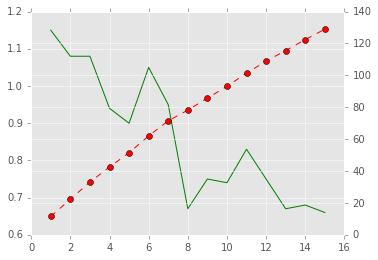

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=1)
fig.subplots_adjust(right=0.85)

par1 = axes.twinx()

ind = df.index.values[0:N_TICKS_DISPLAY] + 1

p1, = axes.plot(ind, df['N_installed'][0:N_TICKS_DISPLAY]/1000*100, "g-", \
#                label=r'$\%\ installations\: CA\pm 2\sigma$')
                label=r'$\%\ installations\: CA\:(each\:year)$')
p2, = par1.plot(ind, df['N_installed_sum'][0:N_TICKS_DISPLAY], "--ro", \
                label=r'$total\:installations\: CA \pm 2\sigma$')


p3, = axes.plot(ind, df_ma['N_installed'][0:N_TICKS_DISPLAY]/1000*100, "c-", \
#                label=r'$\%\ installations\: MA\pm 2\sigma$')
                label=r'$\%\ installations\: MA\:(each\:year)$')
p4, = par1.plot(ind, df_ma['N_installed_sum'][0:N_TICKS_DISPLAY], "--mo", \
                label=r'$total\:installations\: MA\pm 2\sigma$')


#add +- 2 std
#axes.fill_between(ind, 
#                  df['N_installed'][0:N_TICKS_DISPLAY]/1000*100-2*df_std['N_installed'][0:N_TICKS_DISPLAY]/1000*100, 
#                  df['N_installed'][0:N_TICKS_DISPLAY]/1000*100+2*df_std['N_installed'][0:N_TICKS_DISPLAY]/1000*100, 
#                  color='g', 
#                  alpha=0.2)
#axes.fill_between(ind, 
#                  df_ma['N_installed'][0:N_TICKS_DISPLAY]/1000*100-2*df_ma_std['N_installed'][0:N_TICKS_DISPLAY]/1000*100, 
#                  df_ma['N_installed'][0:N_TICKS_DISPLAY]/1000*100+2*df_ma_std['N_installed'][0:N_TICKS_DISPLAY]/1000*100, 
#                  color='c', 
#                  alpha=0.2)

par1.fill_between(ind, 
                 df['N_installed_sum'][0:N_TICKS_DISPLAY]-2*df_std['N_installed_sum'][0:N_TICKS_DISPLAY],
                 df['N_installed_sum'][0:N_TICKS_DISPLAY]+2*df_std['N_installed_sum'][0:N_TICKS_DISPLAY],
                  color='r', 
                  alpha=0.2)

par1.fill_between(ind, 
                 df_ma['N_installed_sum'][0:N_TICKS_DISPLAY]-2*df_ma_std['N_installed_sum'][0:N_TICKS_DISPLAY],
                 df_ma['N_installed_sum'][0:N_TICKS_DISPLAY]+2*df_ma_std['N_installed_sum'][0:N_TICKS_DISPLAY],
                  color='m', 
                  alpha=0.2)

axes.set_xlabel("Time")
axes.set_ylabel("Hit % installations (each year)")
par1.set_ylabel("Total number of installations")

axes.set_autoscaley_on(False)
axes.set_xlim([1,15])
start = 1
end = 16
axes.xaxis.set_ticks(np.arange(start, end, 1))

axes.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())


tkw = dict(size=4, width=1.5)
axes.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
axes.tick_params(axis='x', **tkw)

lines = [p1, p3, p2, p4]

axes.legend(lines, [l.get_label() for l in lines], fontsize='10')
plt.savefig('Simulation_results_install_CA_MA_' + '_' + test_name + '_Jul23' + '.png', dpi=300)
plt.show()

In [13]:
df['N_installed_sum'][0:N_TICKS_DISPLAY]/1000*100 #cost ==

0      1.15
1      2.23
2      3.31
3      4.25
4      5.15
5      6.20
6      7.15
7      7.82
8      8.57
9      9.31
10    10.14
11    10.89
12    11.56
13    12.24
14    12.90
Name: N_installed_sum, dtype: float64

In [15]:
df['N_installed_sum'][0:N_TICKS_DISPLAY]/1000*100 #cost 30

0     0.87
1     1.59
2     2.09
3     2.65
4     3.26
5     3.66
6     4.17
7     4.56
8     4.82
9     5.04
10    5.28
11    5.54
12    5.75
13    5.95
14    6.14
Name: N_installed_sum, dtype: float64

In [17]:
df['N_installed_sum'][0:N_TICKS_DISPLAY]/1000*100 #cost 10

0      1.57
1      3.12
2      5.22
3      7.65
4     10.74
5     14.05
6     17.57
7     21.24
8     24.78
9     28.10
10    31.28
11    34.52
12    37.60
13    40.28
14    42.75
Name: N_installed_sum, dtype: float64

In [19]:
df['N_installed_sum'][0:N_TICKS_DISPLAY]/1000*100 #utility 0.75

0      3.22
1      5.95
2      8.13
3     10.29
4     12.28
5     14.11
6     15.94
7     17.77
8     19.74
9     21.32
10    22.94
11    24.67
12    26.32
13    27.88
14    29.19
Name: N_installed_sum, dtype: float64

In [21]:
df['N_installed_sum'][0:N_TICKS_DISPLAY]/1000*100 #utility 0.25

0     0.31
1     0.68
2     0.99
3     1.35
4     1.60
5     1.92
6     2.17
7     2.53
8     2.82
9     3.02
10    3.22
11    3.37
12    3.58
13    3.78
14    3.95
Name: N_installed_sum, dtype: float64

In [23]:
df['N_installed_sum'][0:N_TICKS_DISPLAY]/1000*100 #hardware 0.975

0      1.16
1      2.18
2      3.06
3      4.02
4      4.81
5      5.47
6      6.02
7      6.68
8      7.49
9      8.05
10     8.53
11     9.05
12     9.72
13    10.18
14    10.67
Name: N_installed_sum, dtype: float64

In [26]:
df['N_installed_sum'][0:N_TICKS_DISPLAY]/1000*100 #hardware 0.325

0      1.40
1      2.56
2      3.74
3      5.00
4      6.04
5      7.32
6      8.61
7      9.64
8     10.89
9     11.96
10    12.91
11    13.95
12    14.91
13    15.87
14    16.69
Name: N_installed_sum, dtype: float64

In [12]:
df['N_installed_sum'][0:N_TICKS_DISPLAY]/1000*100 #eff 0.24

0      1.11
1      2.33
2      3.40
3      4.32
4      5.43
5      6.15
6      7.10
7      8.01
8      8.86
9      9.61
10    10.34
11    10.93
12    11.70
13    12.35
14    12.99
Name: N_installed_sum, dtype: float64

In [10]:
df['N_installed_sum'][0:N_TICKS_DISPLAY]/1000*100 #eff 0.08 cost = base

0      1.44
1      2.56
2      3.47
3      4.36
4      5.34
5      6.25
6      6.99
7      7.69
8      8.46
9      9.16
10     9.88
11    10.67
12    11.35
13    12.12
14    12.81
Name: N_installed_sum, dtype: float64

In [8]:
df['N_installed_sum'][0:N_TICKS_DISPLAY]/1000*100 #jul 29, eff 0.24, cost 0.325

0      1.42
1      2.72
2      4.09
3      5.38
4      6.64
5      7.71
6      8.78
7      9.82
8     10.95
9     11.91
10    12.89
11    13.81
12    14.77
13    15.57
14    16.23
Name: N_installed_sum, dtype: float64

In [14]:
df['N_installed_sum'][0:N_TICKS_DISPLAY]/1000*100 #jul 29, eff 0.08, cost 0.975

0      1.32
1      2.22
2      3.15
3      3.98
4      4.76
5      5.46
6      6.04
7      6.61
8      7.24
9      7.88
10     8.48
11     9.12
12     9.66
13    10.14
14    10.73
Name: N_installed_sum, dtype: float64

In [16]:
df['N_installed_sum'][0:N_TICKS_DISPLAY]/1000*100 #jul 29, rel 0.3

0      1.50
1      2.61
2      3.67
3      4.62
4      5.57
5      6.44
6      7.15
7      7.97
8      8.75
9      9.51
10    10.18
11    10.77
12    11.43
13    12.08
14    12.66
Name: N_installed_sum, dtype: float64

In [18]:
df['N_installed_sum'][0:N_TICKS_DISPLAY]/1000*100 #jul 29, rel 0.1

0      1.37
1      2.62
2      3.64
3      4.69
4      5.78
5      6.81
6      7.79
7      8.61
8      9.47
9     10.44
10    11.19
11    12.00
12    12.84
13    13.50
14    14.26
Name: N_installed_sum, dtype: float64

In [9]:
df['N_installed_sum'][0:N_TICKS_DISPLAY]/1000*100 #sep 17, prof f. up 

0      1.28
1      2.44
2      3.77
3      4.92
4      5.82
5      6.71
6      7.62
7      8.58
8      9.49
9     10.50
10    11.39
11    12.21
12    13.11
13    13.92
14    14.50
Name: N_installed_sum, dtype: float64

In [11]:
df['N_installed_sum'][0:N_TICKS_DISPLAY]/1000*100 #sep 17, prof f.down

0      1.19
1      2.14
2      3.04
3      3.92
4      4.94
5      5.76
6      6.70
7      7.50
8      8.25
9      9.04
10     9.65
11    10.53
12    11.46
13    12.23
14    12.98
Name: N_installed_sum, dtype: float64

In [13]:
df['N_installed_sum'][0:N_TICKS_DISPLAY]/1000*100 #sep 17, main up

0      1.27
1      2.33
2      3.49
3      4.36
4      5.30
5      6.16
6      7.08
7      7.81
8      8.48
9      9.23
10     9.91
11    10.76
12    11.53
13    12.32
14    12.92
Name: N_installed_sum, dtype: float64

In [14]:
df['N_installed_sum'][0:N_TICKS_DISPLAY]/1000*100 #sep 17, main down

0      1.27
1      2.33
2      3.49
3      4.36
4      5.30
5      6.16
6      7.08
7      7.81
8      8.48
9      9.23
10     9.91
11    10.76
12    11.53
13    12.32
14    12.92
Name: N_installed_sum, dtype: float64

In [16]:
df['N_installed_sum'][0:N_TICKS_DISPLAY]/1000*100 #sep 17, main down (repeat)

0      1.34
1      2.36
2      3.45
3      4.39
4      5.37
5      6.14
6      6.96
7      7.87
8      8.59
9      9.33
10    10.12
11    10.84
12    11.60
13    12.21
14    12.86
Name: N_installed_sum, dtype: float64

In [18]:
df['N_installed_sum'][0:N_TICKS_DISPLAY]/1000*100 #sep 17, N up

0      1.19
1      2.33
2      3.59
3      4.72
4      5.68
5      6.65
6      7.51
7      8.33
8      9.05
9      9.72
10    10.53
11    11.23
12    11.77
13    12.43
14    13.21
Name: N_installed_sum, dtype: float64

In [20]:
df['N_installed_sum'][0:N_TICKS_DISPLAY]/1000*100 #sep 17, N down

0      1.01
1      2.06
2      3.04
3      3.95
4      4.90
5      5.84
6      6.83
7      7.58
8      8.25
9      9.02
10     9.73
11    10.36
12    11.22
13    11.81
14    12.52
Name: N_installed_sum, dtype: float64

In [22]:
df['N_installed_sum'][0:N_TICKS_DISPLAY]/1000*100 #sep 17, solar irrad up

0      2.94
1      4.99
2      6.70
3      8.20
4      9.55
5     10.99
6     12.39
7     13.41
8     14.38
9     15.46
10    16.43
11    17.32
12    18.11
13    18.98
14    19.91
Name: N_installed_sum, dtype: float64

In [24]:
df['N_installed_sum'][0:N_TICKS_DISPLAY]/1000*100 #sep 17, solar irrad down

0     0.28
1     0.73
2     1.22
3     1.62
4     2.09
5     2.47
6     2.76
7     3.08
8     3.31
9     3.58
10    3.80
11    4.02
12    4.27
13    4.44
14    4.58
Name: N_installed_sum, dtype: float64

In [26]:
df['N_installed_sum'][0:N_TICKS_DISPLAY]/1000*100 #sep 17, roof up

0      1.47
1      2.69
2      3.65
3      4.60
4      5.63
5      6.57
6      7.60
7      8.47
8      9.33
9     10.28
10    11.09
11    11.79
12    12.76
13    13.47
14    14.08
Name: N_installed_sum, dtype: float64

In [28]:
df['N_installed_sum'][0:N_TICKS_DISPLAY]/1000*100 #sep 17, roof down

0      1.36
1      2.27
2      3.12
3      3.89
4      4.82
5      5.58
6      6.34
7      7.16
8      7.80
9      8.48
10     9.23
11    10.10
12    10.79
13    11.39
14    12.05
Name: N_installed_sum, dtype: float64